<a href="https://colab.research.google.com/github/abhay1999/Machine-Learning-Model-Knowledge-based-for-GNR-Interconnects/blob/main/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


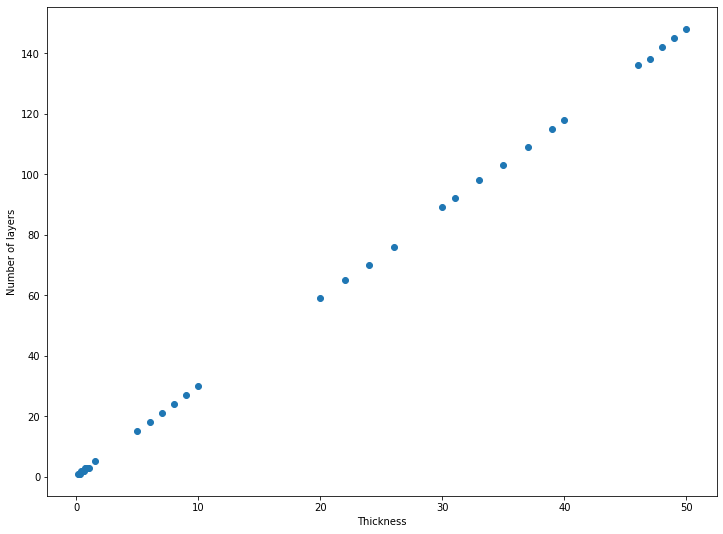

2.9501092422939275 0.11169523364576797


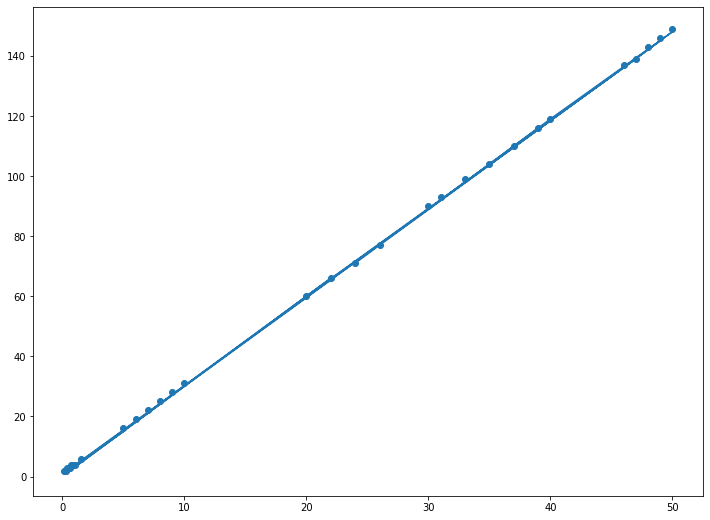

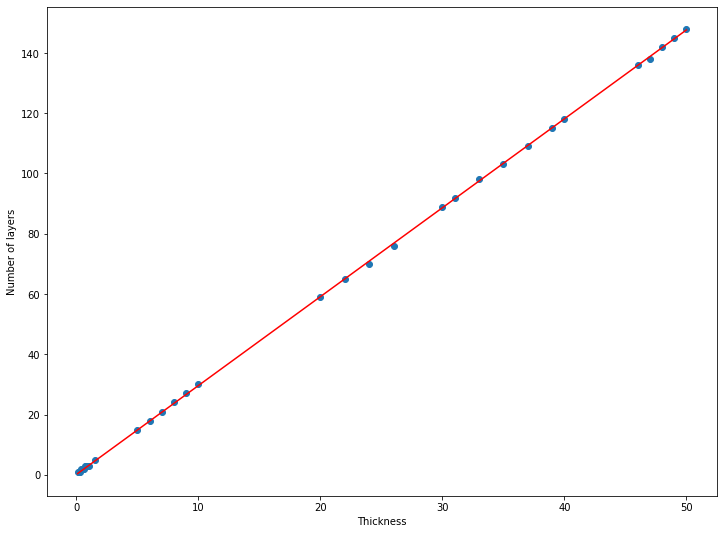

Root mean squared error
0.18648667982023368
R score:
0.9999335602927097
Enter the value of thickness to predict the number of layers:5
number of layers are :
14
Values on X-axis for analytical data:
[24.  26.  47.  20.  30.  40.  50.  10.   9.   8.   7.   6.   0.1  5.
  0.3 22.   0.5  0.6  0.7  0.8  0.9  1.   1.5  0.2  0.4 48.  49.  46.
 31.  33.  35.  37.  39. ]
Values on Y-axis for analytical data:
[ 70  76 138  59  89 118 148  30  27  24  21  18   1  15   1  65   2   2
   3   3   3   3   5   1   2 142 145 136  92  98 103 109 115]
Values on X-axis for analytical data:
[24.  26.  47.  20.  30.  40.  50.  10.   9.   8.   7.   6.   0.1  5.
  0.3 22.   0.5  0.6  0.7  0.8  0.9  1.   1.5  0.2  0.4 48.  49.  46.
 31.  33.  35.  37.  39. ]
Values on Y-axis for predicted data:
[ 70.91431705  76.81453553 138.76682962  59.11388008  88.6149725
 118.11606493 147.61715735  29.61278766  26.66267841  23.71256917
  20.76245993  17.81235069   0.40670616  14.86224145   0.99672801
  65.01409856   1.5867

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('/content/drive/MyDrive/Mini Project/ex1data1.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.xlabel('Thickness')
plt.ylabel('Number of layers')
plt.show()

# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

Y_pred = m*X + c
k=[]
for i in range(len(X)):
  k.append(int(Y_pred[i])+1)
p=[]
for i in range(len(X)):
  p.append(Y[i]+1)
plt.scatter(X,p)
plt.plot(X,k)
plt.show()
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel('Thickness')
plt.ylabel('Number of layers')# regression line
plt.show()


from sklearn.metrics import r2_score

r2 = r2_score(Y_pred, Y)

r2

def cal_rmse(actual_readings, predicted_readings):
    """
    Calculating the root mean square error
    :param actual_readings:
    :param predicted_readings:
    :return:
    """
    square_error_total = 0.0
    total_readings = len(actual_readings)
    for i in range(0, total_readings):
        error = predicted_readings[i] - actual_readings[i]
        square_error_total += pow(error, 2)
    rmse = square_error_total / float(total_readings)
    return rmse

r=cal_rmse(Y,Y_pred)

print('Root mean squared error')
print(r)

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

ys_orig=Y
ys_line=Y_pred
from statistics import mean

r2=coefficient_of_determination(ys_orig,ys_line)

print('R score:')
print(r2)
I=float(input('Enter the value of thickness to predict the number of layers:'))

print("number of layers are :")
print(int(m*I+c))
print('Values on X-axis for analytical data:')
print(np.array(X))
print('Values on Y-axis for analytical data:')
print(np.array(Y))
print('Values on X-axis for analytical data:')
print(np.array(X))
print('Values on Y-axis for predicted data:')
print(np.array(Y_pred))
from numpy import savetxt
savetxt('output_predicted.csv',np.array(Y_pred),delimiter=',')

In [ ]:
from numpy import loadtxt
a=loadtxt('output_predicted.csv',delimiter=',')

In [ ]:
a

array([ 70.91431705,  76.81453553, 138.76682962,  59.11388008,
        88.6149725 , 118.11606493, 147.61715735,  29.61278766,
        26.66267841,  23.71256917,  20.76245993,  17.81235069,
         0.40670616,  14.86224145,   0.99672801,  65.01409856,
         1.58674985,   1.88176078,   2.1767717 ,   2.47178263,
         2.76679355,   3.06180448,   4.5368591 ,   0.70171708,
         1.29173893, 141.71693886, 144.66704811, 135.81672038,
        91.56508174,  97.46530023, 103.36551871, 109.2657372 ,
       115.16595568])